<a href="https://colab.research.google.com/github/Kavyaareads/Gender-classification/blob/main/finalproj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Create a Python program that uses a neural network to classify the gender of a person in an uploaded image. The program should prompt the user to upload an image and then output whether the image is classified as male or female.

## Data collection and preparation

### Subtask:
Gather a dataset of images with corresponding gender labels. Split the dataset into training and testing sets and preprocess the images (resize, normalize, etc.) for the neural network.


**Reasoning**:
Download and extract a suitable dataset for gender classification, then load and preprocess the images and labels, split the data into training and testing sets, and convert the labels to a suitable numerical format.



**Reasoning**:
The previous attempt to download and extract the dataset failed because the downloaded file was not a valid zip file. This could be due to a number of reasons, including an invalid URL or a network issue during download. The next step is to attempt to download the dataset again, ensuring the download is successful before attempting extraction. If the download is successful, the subsequent steps of loading, preprocessing, and splitting the data will be performed.



## Data collection and preparation

### Subtask:
Gather a dataset of images with corresponding gender labels. Split the dataset into training and testing sets and preprocess the images (resize, normalize, etc.) for the neural network.


## Model building

### Subtask:
Define a neural network architecture suitable for image classification, such as a Convolutional Neural Network (CNN).


**Reasoning**:
Define a CNN model architecture using Keras Sequential model and common layers for image classification.



In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')
])

# Display the model summary
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,898 (12.61 MB)

 Trainable params: 3,304,898 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

**Reasoning**:
The previous code failed because `IMG_WIDTH` and `IMG_HEIGHT` were not defined in the current session. I need to define these variables again before defining the model.



In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define image dimensions (re-defining as they were lost)
IMG_WIDTH = 128
IMG_HEIGHT = 128

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')
])

# Display the model summary
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,898 (12.61 MB)

 Trainable params: 3,304,898 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

## Model Training

### Subtask:
Compile and train the neural network on the training data.

**Reasoning**:
Compile the model with an appropriate optimizer, loss function, and metrics. Then, train the model using the training data and validate it with the testing data.

In [40]:
!unzip -l archive.zip

unzip:  cannot find or open archive.zip, archive.zip.zip or archive.zip.ZIP.


In [41]:
!pip install kagglehub

## Data Collection and Preparation (using KaggleHub)

### Subtask:
Download the dataset from KaggleHub, split it into training and testing sets, and preprocess the images.

**Reasoning**:
Use `kagglehub.dataset_download` to get the dataset. Then, load and preprocess the images and labels from the downloaded directory, split the data, and convert labels to a suitable numerical format.

In [42]:
!pip install kaggle

In [43]:
import os
import json

# Create the .kaggle directory if it doesn't exist
!mkdir -p ~/.kaggle

# Define the path to the uploaded file and the destination path
uploaded_file_path = 'kaggle (2).json'
destination_path = os.path.expanduser('~/.kaggle/kaggle.json')

# Check if the uploaded file exists
if os.path.exists(uploaded_file_path):
    # Move and rename the file
    !mv "{uploaded_file_path}" "{destination_path}"
    print(f"Moved '{uploaded_file_path}' to '{destination_path}'")

    # Set permissions for the kaggle.json file
    # This is crucial for security and required by the Kaggle API
    !chmod 600 "{destination_path}"
    print(f"Set permissions for '{destination_path}'")
else:
    print(f"Error: The file '{uploaded_file_path}' was not found. Please ensure you uploaded 'kaggle (2).json' to your Colab environment.")

Error: The file 'kaggle (2).json' was not found. Please ensure you uploaded 'kaggle (2).json' to your Colab environment.


## Data Collection and Preparation (using Kaggle API)

### Subtask:
Download the dataset from Kaggle using the API, split it into training and testing sets, and preprocess the images.

**Reasoning**:
Use the Kaggle API command to download the dataset. Then, load and preprocess the images and labels from the downloaded directory, split the data, and convert labels to a suitable numerical format.

In [44]:
import os
import zipfile
import requests
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Define dataset source (Kaggle dataset identifier)
dataset_name = "ashwingupta3012/male-and-female-faces-dataset"
dataset_download_path = "male-and-female-faces-dataset" # Local directory to download to

# Download the dataset using Kaggle API
print(f"Downloading dataset from Kaggle: {dataset_name}...")
# Use the Kaggle API command to download the dataset
!kaggle datasets download -d "{dataset_name}" -p "{dataset_download_path}" --unzip

print("Download complete.")


# Define image dimensions
IMG_WIDTH = 128
IMG_HEIGHT = 128

# Load and preprocess images and labels
data = []
labels = []

# Assuming the dataset structure is within the downloaded directory, e.g., male and female subfolders
# We need to find the actual path to the image folders after unzipping.
# Let's inspect the downloaded directory structure.
print(f"Listing contents of downloaded directory: {dataset_download_path}")
downloaded_contents = os.listdir(dataset_download_path)
print(downloaded_contents)

# Based on the output, the relevant data is in the subdirectory 'Male and Female face dataset'
# We need to adjust the base_data_path to point to this subdirectory.
base_data_path = os.path.join(dataset_download_path, 'Male and Female face dataset')


for gender in ["male", "female"]:
    gender_path = os.path.join(base_data_path, gender)
    if not os.path.exists(gender_path):
        print(f"Warning: Gender directory not found at {gender_path}. Skipping.")
        continue

    for img_name in os.listdir(gender_path):
        img_path = os.path.join(gender_path, img_name)
        # Skip if it's not a file (e.g., a hidden directory)
        if not os.path.isfile(img_path):
            continue
        try:
            img = load_img(img_path, target_size=(IMG_WIDTH, IMG_HEIGHT))
            img_array = img_to_array(img)
            # Normalize pixel values
            img_array /= 255.0
            data.append(img_array)
            labels.append(gender)
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")


# Convert lists to numpy arrays
if data and labels:
    data = np.array(data)
    labels = np.array(labels)

    # Convert labels to numerical format (one-hot encoding)
    label_map = {"male": 0, "female": 1}
    numerical_labels = np.array([label_map[label] for label in labels])
    one_hot_labels = tf.keras.utils.to_categorical(numerical_labels, num_classes=2)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(data, one_hot_labels, test_size=0.2, random_state=42)

    print("Dataset loaded and preprocessed.")
    print(f"Training data shape: {X_train.shape}")
    print(f"Testing data shape: {X_test.shape}")
    print(f"Training labels shape: {y_train.shape}")
    print(f"Testing labels shape: {y_test.shape}")
else:
    print("No images were loaded. Please check the dataset structure after download.")

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'
Download complete.
Listing contents of downloaded directory: male-and-female-faces-dataset


FileNotFoundError: [Errno 2] No such file or directory: 'male-and-female-faces-dataset'

## Model Training

### Subtask:
Compile and train the neural network on the training data.

**Reasoning**:
Compile the model with an appropriate optimizer, loss function, and metrics. Then, train the model using the training data and validate it with the testing data.

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

print("Model training complete.")

## Data Loading, Model Building, and Training (Combined)

### Subtask:
Combine the data loading, model definition, and model training steps into a single cell for reliable execution.

**Reasoning**:
Combine the code from the data loading, model building, and model training steps into one cell to ensure variables are accessible throughout the process.

In [ ]:
import os
import zipfile
import requests
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import kaggle
import json

# --- Data Collection and Preparation (using Kaggle API) ---

# Create the .kaggle directory if it doesn't exist
!mkdir -p ~/.kaggle

# Define the path to the uploaded file and the destination path
uploaded_file_path = 'kaggle (2).json' # Assuming the user uploaded this file
destination_path = os.path.expanduser('~/.kaggle/kaggle.json')

# Check if the uploaded file exists and move/rename it if necessary
if os.path.exists(uploaded_file_path):
    # Move and rename the file
    !mv "{uploaded_file_path}" "{destination_path}"
    print(f"Moved '{uploaded_file_path}' to '{destination_path}'")

    # Set permissions for the kaggle.json file
    !chmod 600 "{destination_path}"
    print(f"Set permissions for '{destination_path}'")
else:
    print(f"Warning: The file '{uploaded_file_path}' was not found. Assuming kaggle.json is already correctly set up.")


# Define dataset source (Kaggle dataset identifier)
dataset_name = "ashwingupta3012/male-and-female-faces-dataset"
dataset_download_path = "male-and-female-faces-dataset" # Local directory to download to

# Download the dataset using Kaggle API
print(f"Downloading dataset from Kaggle: {dataset_name}...")
# Use the Kaggle API command to download the dataset
!kaggle datasets download -d "{dataset_name}" -p "{dataset_download_path}" --unzip

print("Download complete.")


# Define image dimensions
IMG_WIDTH = 128
IMG_HEIGHT = 128

# Load and preprocess images and labels
data = []
labels = []

# Assuming the dataset structure is within the downloaded directory, e.g., male and female subfolders
# We need to find the actual path to the image folders after unzipping.
# Let's inspect the downloaded directory structure.
print(f"Listing contents of downloaded directory: {dataset_download_path}")
downloaded_contents = os.listdir(dataset_download_path)
print(downloaded_contents)

# Based on the output, the relevant data is in the subdirectory 'Male and Female face dataset'
# We need to adjust the base_data_path to point to this subdirectory.
base_data_path = os.path.join(dataset_download_path, 'Male and Female face dataset')

# Update gender list to match actual directory names
for gender_folder_name, gender_label in [("Male Faces", "male"), ("Female Faces", "female")]:
    gender_path = os.path.join(base_data_path, gender_folder_name)
    if not os.path.exists(gender_path):
        print(f"Warning: Gender directory not found at {gender_path}. Skipping.")
        continue

    for img_name in os.listdir(gender_path):
        img_path = os.path.join(gender_path, img_name)
        # Skip if it's not a file (e.g., a hidden directory)
        if not os.path.isfile(img_path):
            continue
        try:
            img = load_img(img_path, target_size=(IMG_WIDTH, IMG_HEIGHT))
            img_array = img_to_array(img)
            # Normalize pixel values
            img_array /= 255.0
            data.append(img_array)
            labels.append(gender_label) # Use the correct label ('male' or 'female')
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")


# Convert lists to numpy arrays
if data and labels:
    data = np.array(data)
    labels = np.array(labels)

    # Convert labels to numerical format (one-hot encoding)
    label_map = {"male": 0, "female": 1}
    numerical_labels = np.array([label_map[label] for label in labels])
    one_hot_labels = tf.keras.utils.to_categorical(numerical_labels, num_classes=2)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(data, one_hot_labels, test_size=0.2, random_state=42)

    print("Dataset loaded and preprocessed.")
    print(f"Training data shape: {X_train.shape}")
    print(f"Testing data shape: {X_test.shape}")
    print(f"Training labels shape: {y_train.shape}")
    print(f"Testing labels shape: {y_test.shape}")
else:
    print("No images were loaded. Please check the dataset structure after download.")
    # Exit or handle the case where no data was loaded
    exit() # Exit the cell execution if no data is loaded


# --- Model Building ---

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')
])

# Display the model summary
print("\nModel Summary:")
model.summary()


# --- Model Training ---

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
print("\nStarting model training...")
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

print("\nModel training complete.")

In [ ]:
import os

# Define the path to the downloaded dataset's main subdirectory
dataset_download_path = "male-and-female-faces-dataset"
base_data_path = os.path.join(dataset_download_path, 'Male and Female face dataset')

print(f"Listing contents of: {base_data_path}")
if os.path.exists(base_data_path):
    print(os.listdir(base_data_path))
else:
    print(f"Directory not found: {base_data_path}")

## Model Evaluation

### Subtask:
Evaluate the trained model's performance on the testing data to assess its accuracy.

**Reasoning**:
Use the trained model to evaluate its performance on the testing dataset and print the evaluation metrics.

In [ ]:
# Evaluate the model on the test data
print("Evaluating model on the test data...")
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

## Image Upload and Prediction

### Subtask:
Create a function to allow the user to upload an image and use the trained model to predict the gender.

**Reasoning**:
Define a function that takes an uploaded image, preprocesses it, and uses the trained model to make a prediction and output the result.

In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from IPython.display import display, Image

# Define image dimensions (make sure these match the model's expected input)
IMG_WIDTH = 128
IMG_HEIGHT = 128

def predict_gender_from_upload(model, label_map):
    uploaded = files.upload()

    for filename in uploaded.keys():
        print(f'User uploaded file "{filename}"')

        # Display the uploaded image
        display(Image(filename))

        # Load and preprocess the image
        try:
            img = load_img(filename, target_size=(IMG_WIDTH, IMG_HEIGHT))
            img_array = img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0) # Add batch dimension
            img_array /= 255.0 # Normalize

            # Make prediction using the trained model
            prediction = model.predict(img_array)
            predicted_class_index = np.argmax(prediction, axis=1)[0]

            # Get the gender label from the label_map
            # We need to reverse the label_map to get the label from the index
            reverse_label_map = {v: k for k, v in label_map.items()}
            predicted_gender = reverse_label_map[predicted_class_index]

            print(f"\nPredicted gender: {predicted_gender.capitalize()}")


        except Exception as e:
            print(f"Error processing image {filename}: {e}")

# Define the label_map before calling the function
# This ensures it's available even if the data loading cell wasn't run immediately before
label_map = {"male": 0, "female": 1}

# Call the function to start the upload process
# Pass the trained model and the label_map to the function
# Ensure 'model' is available in the current session (it's defined in cell 96a84882)
if 'model' in globals():
    predict_gender_from_upload(model, label_map)
else:
    print("Error: The model is not defined. Please run the cell that builds and trains the model.")

## Interactive Image Upload and Prediction UI

### Subtask:
Create an interactive user interface within the notebook for image upload and gender prediction.

**Reasoning**:
Use `ipywidgets` to create an interactive upload button and output area to display the uploaded image and the prediction result.

In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from IPython.display import display, Image
import ipywidgets as widgets
from IPython.display import clear_output
from PIL import Image as PILImage
import io

# Define image dimensions (make sure these match the model's expected input)
IMG_WIDTH = 128
IMG_HEIGHT = 128

# Create output widgets for displaying the image and prediction
image_output = widgets.Output()
prediction_output = widgets.Output()

def predict_gender_interactive(change):
    with image_output:
        clear_output(wait=True)
        uploaded_file = change['owner']
        filename = uploaded_file.value

        if filename:
            print(f'User uploaded file "{list(filename.keys())[0]}"')

            # Get the uploaded image data
            img_data = list(filename.values())[0]['content']
            img = Image(img_data)

            # Display the uploaded image
            display(img)

    with prediction_output:
        clear_output(wait=True)
        # Load and preprocess the image from bytes
        try:
            img_pil = PILImage.open(io.BytesIO(img_data)).resize((IMG_WIDTH, IMG_HEIGHT))
            img_array = img_to_array(img_pil)
            img_array = np.expand_dims(img_array, axis=0) # Add batch dimension
            img_array /= 255.0 # Normalize

            # Make prediction using the trained model
            # Ensure 'model' and 'label_map' are available in the current session
            if 'model' in globals() and 'label_map' in globals():
                prediction = model.predict(img_array)
                predicted_class_index = np.argmax(prediction, axis=1)[0]

                # Get the gender label from the label_map
                reverse_label_map = {v: k for k, v in label_map.items()}
                predicted_gender = reverse_label_map[predicted_class_index]

                print(f"Predicted gender: {predicted_gender.capitalize()}")
            else:
                print("Model or label map not found. Please ensure the model is trained.")


        except Exception as e:
            with prediction_output:
                 clear_output(wait=True)
                 print(f"Error processing image: {e}")

# Create an upload button
upload_button = widgets.FileUpload(
    accept='image/*',  # Accept only image files
    multiple=False,  # Allow only one file upload at a time
    description='Upload Image', # Add a description to the button
    button_style='primary', # Style the button
    tooltip='Click to upload an image for gender classification', # Add a tooltip
    icon='upload' # Add an icon
)

# Create a label for instructions
instruction_label = widgets.Label("Upload an image for gender classification:")

# Arrange widgets using VBox and HBox for better layout
# Create a container for the upload button and instruction label
upload_box = widgets.HBox([instruction_label, upload_button])

# Create a container for the image and prediction outputs
output_box = widgets.VBox([image_output, prediction_output])


print("Interactive Gender Classification:")

# Observe changes in the upload button
upload_button.observe(predict_gender_interactive, names='value')

# Display the arranged widgets
display(widgets.VBox([upload_box, output_box]))

# Task
Create a Python script using TensorFlow/Keras to build a gender classification model using a neural network. The script should:
1. Download the dataset from "https://www.kaggle.com/datasets/ashwingupta3012/male-and-female-faces-dataset".
2. Train a neural network model on this dataset to classify images as male or female.
3. Include a basic user interface that allows the user to upload an image.
4. Use the trained model to predict the gender of the uploaded image and display the result.
5. Ensure the code is well-commented and the notebook is organized with clear explanations in markdown cells.
6. Improve the basic UI for better presentation.

## Model Training Visualization

### Subtask:
Visualize the training and validation accuracy and loss over the epochs to assess model performance during training.

**Reasoning**:
Use the `history` object returned by the `model.fit` method to plot the training and validation accuracy and loss over the training epochs. This helps in understanding how the model learned and if it's overfitting or underfitting.

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Data Collection and Preparation (using KaggleHub)

### Subtask:
Download the dataset from KaggleHub using `kagglehub.dataset_download`.

**Reasoning**:
Use the `kagglehub.dataset_download` function to download the specified dataset.

In [45]:
import kagglehub
import os

# Define the dataset identifier
dataset_identifier = "playlist/men-women-classification" # Corrected dataset identifier
dataset_download_path = "men-women-classification-dataset" # Local directory to download to

print(f"Downloading dataset from KaggleHub: {dataset_identifier}...")

try:
    # Download the dataset
    kagglehub.dataset_download(dataset_identifier, path=dataset_download_path)
    print("Download complete.")

    # List the contents of the downloaded directory to understand the structure
    print(f"Listing contents of downloaded directory: {dataset_download_path}")
    if os.path.exists(dataset_download_path):
        for root, dirs, files in os.walk(dataset_download_path):
            level = root.replace(dataset_download_path, '').count(os.sep)
            indent = ' ' * 4 * (level)
            print(f'{indent}{os.path.basename(root)}/')
            subindent = ' ' * 4 * (level + 1)
            for f in files:
                print(f'{subindent}{f}')
    else:
        print(f"Downloaded directory not found at: {dataset_download_path}")

except Exception as e:
    print(f"Error downloading dataset: {e}")
    print("Please ensure you have accepted the dataset's terms and conditions on Kaggle.")

Error downloading dataset: 'men-women-classification-dataset' is not present in the dataset files. You can access the other files of the attached dataset at '/kaggle/input/men-women-classification'
Please ensure you have accepted the dataset's terms and conditions on Kaggle.


## Data Loading, Model Building, and Training (Combined)

### Subtask:
Combine the data loading, model definition, and model training steps into a single cell for reliable execution.

**Reasoning**:
Combine the code from the data loading, model building, and model training steps into one cell to ensure variables are accessible throughout the process. This will include dynamically finding the image directories within the downloaded dataset.

In [48]:
import os
import zipfile
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import kagglehub
import json

# --- Data Collection and Preparation (using KaggleHub) ---

# Define the dataset identifier. The actual download path is different.
dataset_identifier = "playlist/men-women-classification"
# The actual path where KaggleHub downloads the dataset is in /kaggle/input/
dataset_actual_path = "/kaggle/input/men-women-classification"


print(f"Loading data from downloaded dataset at: {dataset_actual_path}")

# Dynamically find the directories containing the images
image_dirs = {}
if os.path.exists(dataset_actual_path):
    for dir_name in os.listdir(dataset_actual_path):
        dir_path = os.path.join(dataset_actual_path, dir_name)
        if os.path.isdir(dir_path) and dir_name.lower() in ["men", "women", "male", "female", "male faces", "female faces"]:
            image_dirs[dir_name.lower()] = dir_path
else:
    print(f"Error: Dataset directory not found at {dataset_actual_path}. Please ensure the dataset was downloaded correctly.")


print(f"Identified image directories: {image_dirs}")

# Define image dimensions (make sure these match the model's expected input)
IMG_WIDTH = 128
IMG_HEIGHT = 128

# Load and preprocess images and labels
data = []
labels = []

# Map directory names to standardized labels
label_mapping = {
    "men": "male",
    "women": "female",
    "male": "male",
    "female": "female",
    "male faces": "male",
    "female faces": "female"
}


for dir_name, dir_path in image_dirs.items():
    gender_label = label_mapping.get(dir_name)
    if gender_label is None:
        print(f"Warning: Unknown directory '{dir_name}'. Skipping.")
        continue

    print(f"Loading images from: {dir_path} with label '{gender_label}'")
    for img_name in os.listdir(dir_path):
        img_path = os.path.join(dir_path, img_name)
        # Skip if it's not a file (e.g., a hidden directory or other non-image file)
        if not os.path.isfile(img_path) or img_name.startswith('.'):
            continue
        try:
            img = load_img(img_path, target_size=(IMG_WIDTH, IMG_HEIGHT))
            img_array = img_to_array(img)
            # Normalize pixel values
            img_array /= 255.0
            data.append(img_array)
            labels.append(gender_label)
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")


# Convert lists to numpy arrays
if data and labels:
    data = np.array(data)
    labels = np.array(labels)

    # Convert labels to numerical format (one-hot encoding)
    # Ensure the label_map uses the standardized labels ("male", "female")
    label_map = {"male": 0, "female": 1}
    numerical_labels = np.array([label_map[label] for label in labels])
    one_hot_labels = tf.keras.utils.to_categorical(numerical_labels, num_classes=2)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(data, one_hot_labels, test_size=0.2, random_state=42)

    print("\nDataset loaded and preprocessed.")
    print(f"Training data shape: {X_train.shape}")
    print(f"Testing data shape: {X_test.shape}")
    print(f"Training labels shape: {y_test.shape}")
    print(f"Testing labels shape: {y_test.shape}")
else:
    print("\nNo images were loaded. Please check the dataset structure in the downloaded directory.")
    # Exit or handle the case where no data is loaded
    # Depending on how you want to proceed if no data is loaded, you might raise an error or exit.
    # For now, we'll just print a message. The model building and training will likely fail
    # if X_train and y_train are empty, which is expected behavior if data loading fails.


# --- Model Building ---

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')
])

# Display the model summary
print("\nModel Summary:")
model.summary()


# --- Model Training ---

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
print("\nStarting model training...")
# Check if training data exists before attempting to train
if 'X_train' in locals() and 'y_train' in locals() and len(X_train) > 0:
    history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
    print("\nModel training complete.")
else:
    print("\nSkipping model training as no training data was loaded.")

Loading data from downloaded dataset at: /kaggle/input/men-women-classification
Identified image directories: {'men': '/kaggle/input/men-women-classification/men', 'women': '/kaggle/input/men-women-classification/women'}
Loading images from: /kaggle/input/men-women-classification/men with label 'male'
Loading images from: /kaggle/input/men-women-classification/women with label 'female'


KeyboardInterrupt: 

In [49]:
import os
import zipfile
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import kagglehub
import json

# --- Data Collection and Preparation (using KaggleHub) ---

# Define the dataset identifier. The actual download path is different.
dataset_identifier = "playlist/men-women-classification"
# The actual path where KaggleHub downloads the dataset is in /kaggle/input/
dataset_actual_path = "/kaggle/input/men-women-classification"


print(f"Loading data from downloaded dataset at: {dataset_actual_path}")

# Dynamically find the directories containing the images
image_dirs = {}
if os.path.exists(dataset_actual_path):
    for dir_name in os.listdir(dataset_actual_path):
        dir_path = os.path.join(dataset_actual_path, dir_name)
        if os.path.isdir(dir_path) and dir_name.lower() in ["men", "women", "male", "female", "male faces", "female faces"]:
            image_dirs[dir_name.lower()] = dir_path
else:
    print(f"Error: Dataset directory not found at {dataset_actual_path}. Please ensure the dataset was downloaded correctly.")


print(f"Identified image directories: {image_dirs}")

# Define image dimensions (make sure these match the model's expected input)
IMG_WIDTH = 128
IMG_HEIGHT = 128

# Load and preprocess images and labels
data = []
labels = []

# Map directory names to standardized labels
label_mapping = {
    "men": "male",
    "women": "female",
    "male": "male",
    "female": "female",
    "male faces": "male",
    "female faces": "female"
}


for dir_name, dir_path in image_dirs.items():
    gender_label = label_mapping.get(dir_name)
    if gender_label is None:
        print(f"Warning: Unknown directory '{dir_name}'. Skipping.")
        continue

    print(f"Loading images from: {dir_path} with label '{gender_label}'")
    for img_name in os.listdir(dir_path):
        img_path = os.path.join(dir_path, img_name)
        # Skip if it's not a file (e.g., a hidden directory or other non-image file)
        if not os.path.isfile(img_path) or img_name.startswith('.'):
            continue
        try:
            img = load_img(img_path, target_size=(IMG_WIDTH, IMG_HEIGHT))
            img_array = img_to_array(img)
            # Normalize pixel values
            img_array /= 255.0
            data.append(img_array)
            labels.append(gender_label)
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")


# Convert lists to numpy arrays
if data and labels:
    data = np.array(data)
    labels = np.array(labels)

    # Convert labels to numerical format (one-hot encoding)
    # Ensure the label_map uses the standardized labels ("male", "female")
    label_map = {"male": 0, "female": 1}
    numerical_labels = np.array([label_map[label] for label in labels])
    one_hot_labels = tf.keras.utils.to_categorical(numerical_labels, num_classes=2)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(data, one_hot_labels, test_size=0.2, random_state=42)

    print("\nDataset loaded and preprocessed.")
    print(f"Training data shape: {X_train.shape}")
    print(f"Testing data shape: {X_test.shape}")
    print(f"Training labels shape: {y_test.shape}")
    print(f"Testing labels shape: {y_test.shape}")
else:
    print("\nNo images were loaded. Please check the dataset structure in the downloaded directory.")
    # Exit or handle the case where no data is loaded
    # Depending on how you want to proceed if no data is loaded, you might raise an error or exit.
    # For now, we'll just print a message. The model building and training will likely fail
    # if X_train and y_train are empty, which is expected behavior if data loading fails.


# --- Model Building ---

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')
])

# Display the model summary
print("\nModel Summary:")
model.summary()


# --- Model Training ---

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
print("\nStarting model training...")
# Check if training data exists before attempting to train
if 'X_train' in locals() and 'y_train' in locals() and len(X_train) > 0:
    history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
    print("\nModel training complete.")
else:
    print("\nSkipping model training as no training data was loaded.")

Loading data from downloaded dataset at: /kaggle/input/men-women-classification
Identified image directories: {'men': '/kaggle/input/men-women-classification/men', 'women': '/kaggle/input/men-women-classification/women'}
Loading images from: /kaggle/input/men-women-classification/men with label 'male'
Loading images from: /kaggle/input/men-women-classification/women with label 'female'

Dataset loaded and preprocessed.
Training data shape: (2664, 128, 128, 3)
Testing data shape: (666, 128, 128, 3)
Training labels shape: (666, 2)
Testing labels shape: (666, 2)

Model Summary:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,898 (12.61 MB)

 Trainable params: 3,304,898 (12.61 MB)

 Non-trainable params: 0 (0.00 B)


Starting model training...
Epoch 1/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - accuracy: 0.5698 - loss: 0.8701 - val_accuracy: 0.5736 - val_loss: 0.6671
Epoch 2/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 129s 916ms/step - accuracy: 0.6261 - loss: 0.6459 - val_accuracy: 0.6622 - val_loss: 0.6296
Epoch 3/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 78s 928ms/step - accuracy: 0.6616 - loss: 0.6243 - val_accuracy: 0.6727 - val_loss: 0.6160
Epoch 4/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 81s 913ms/step - accuracy: 0.6765 - loss: 0.5865 - val_accuracy: 0.6712 - val_loss: 0.6329
Epoch 5/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 82s 917ms/step - accuracy: 0.7658 - loss: 0.4907 - val_accuracy: 0.6787 - val_loss: 0.6313
Epoch 6/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 82s 915ms/step - accuracy: 0.8125 - loss: 0.4182 - val_accuracy: 0.6592 - val_loss: 0.6630
Epoch 7/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 87s 973ms/step - accuracy: 0.8539 - loss: 0.3323 - val_accuracy: 0.6697 - val_loss: 0.7801
Epoch 8/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 77s 913ms/step - accuracy: 0.8940

## Model Evaluation

### Subtask:
Evaluate the trained model's performance on the testing data to assess its accuracy.

**Reasoning**:
Use the trained model to evaluate its performance on the testing dataset and print the evaluation metrics.

In [50]:
# Evaluate the model on the test data
print("Evaluating model on the test data...")
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Evaluating model on the test data...
Test Loss: 1.1949
Test Accuracy: 0.6817


## Image Upload and Prediction

### Subtask:
Create a function to allow the user to upload an image and use the trained model to predict the gender.

**Reasoning**:
Define a function that takes an uploaded image, preprocesses it, and uses the trained model to make a prediction and output the result.

Saving female2.jpg to female2.jpg
User uploaded file "female2.jpg"


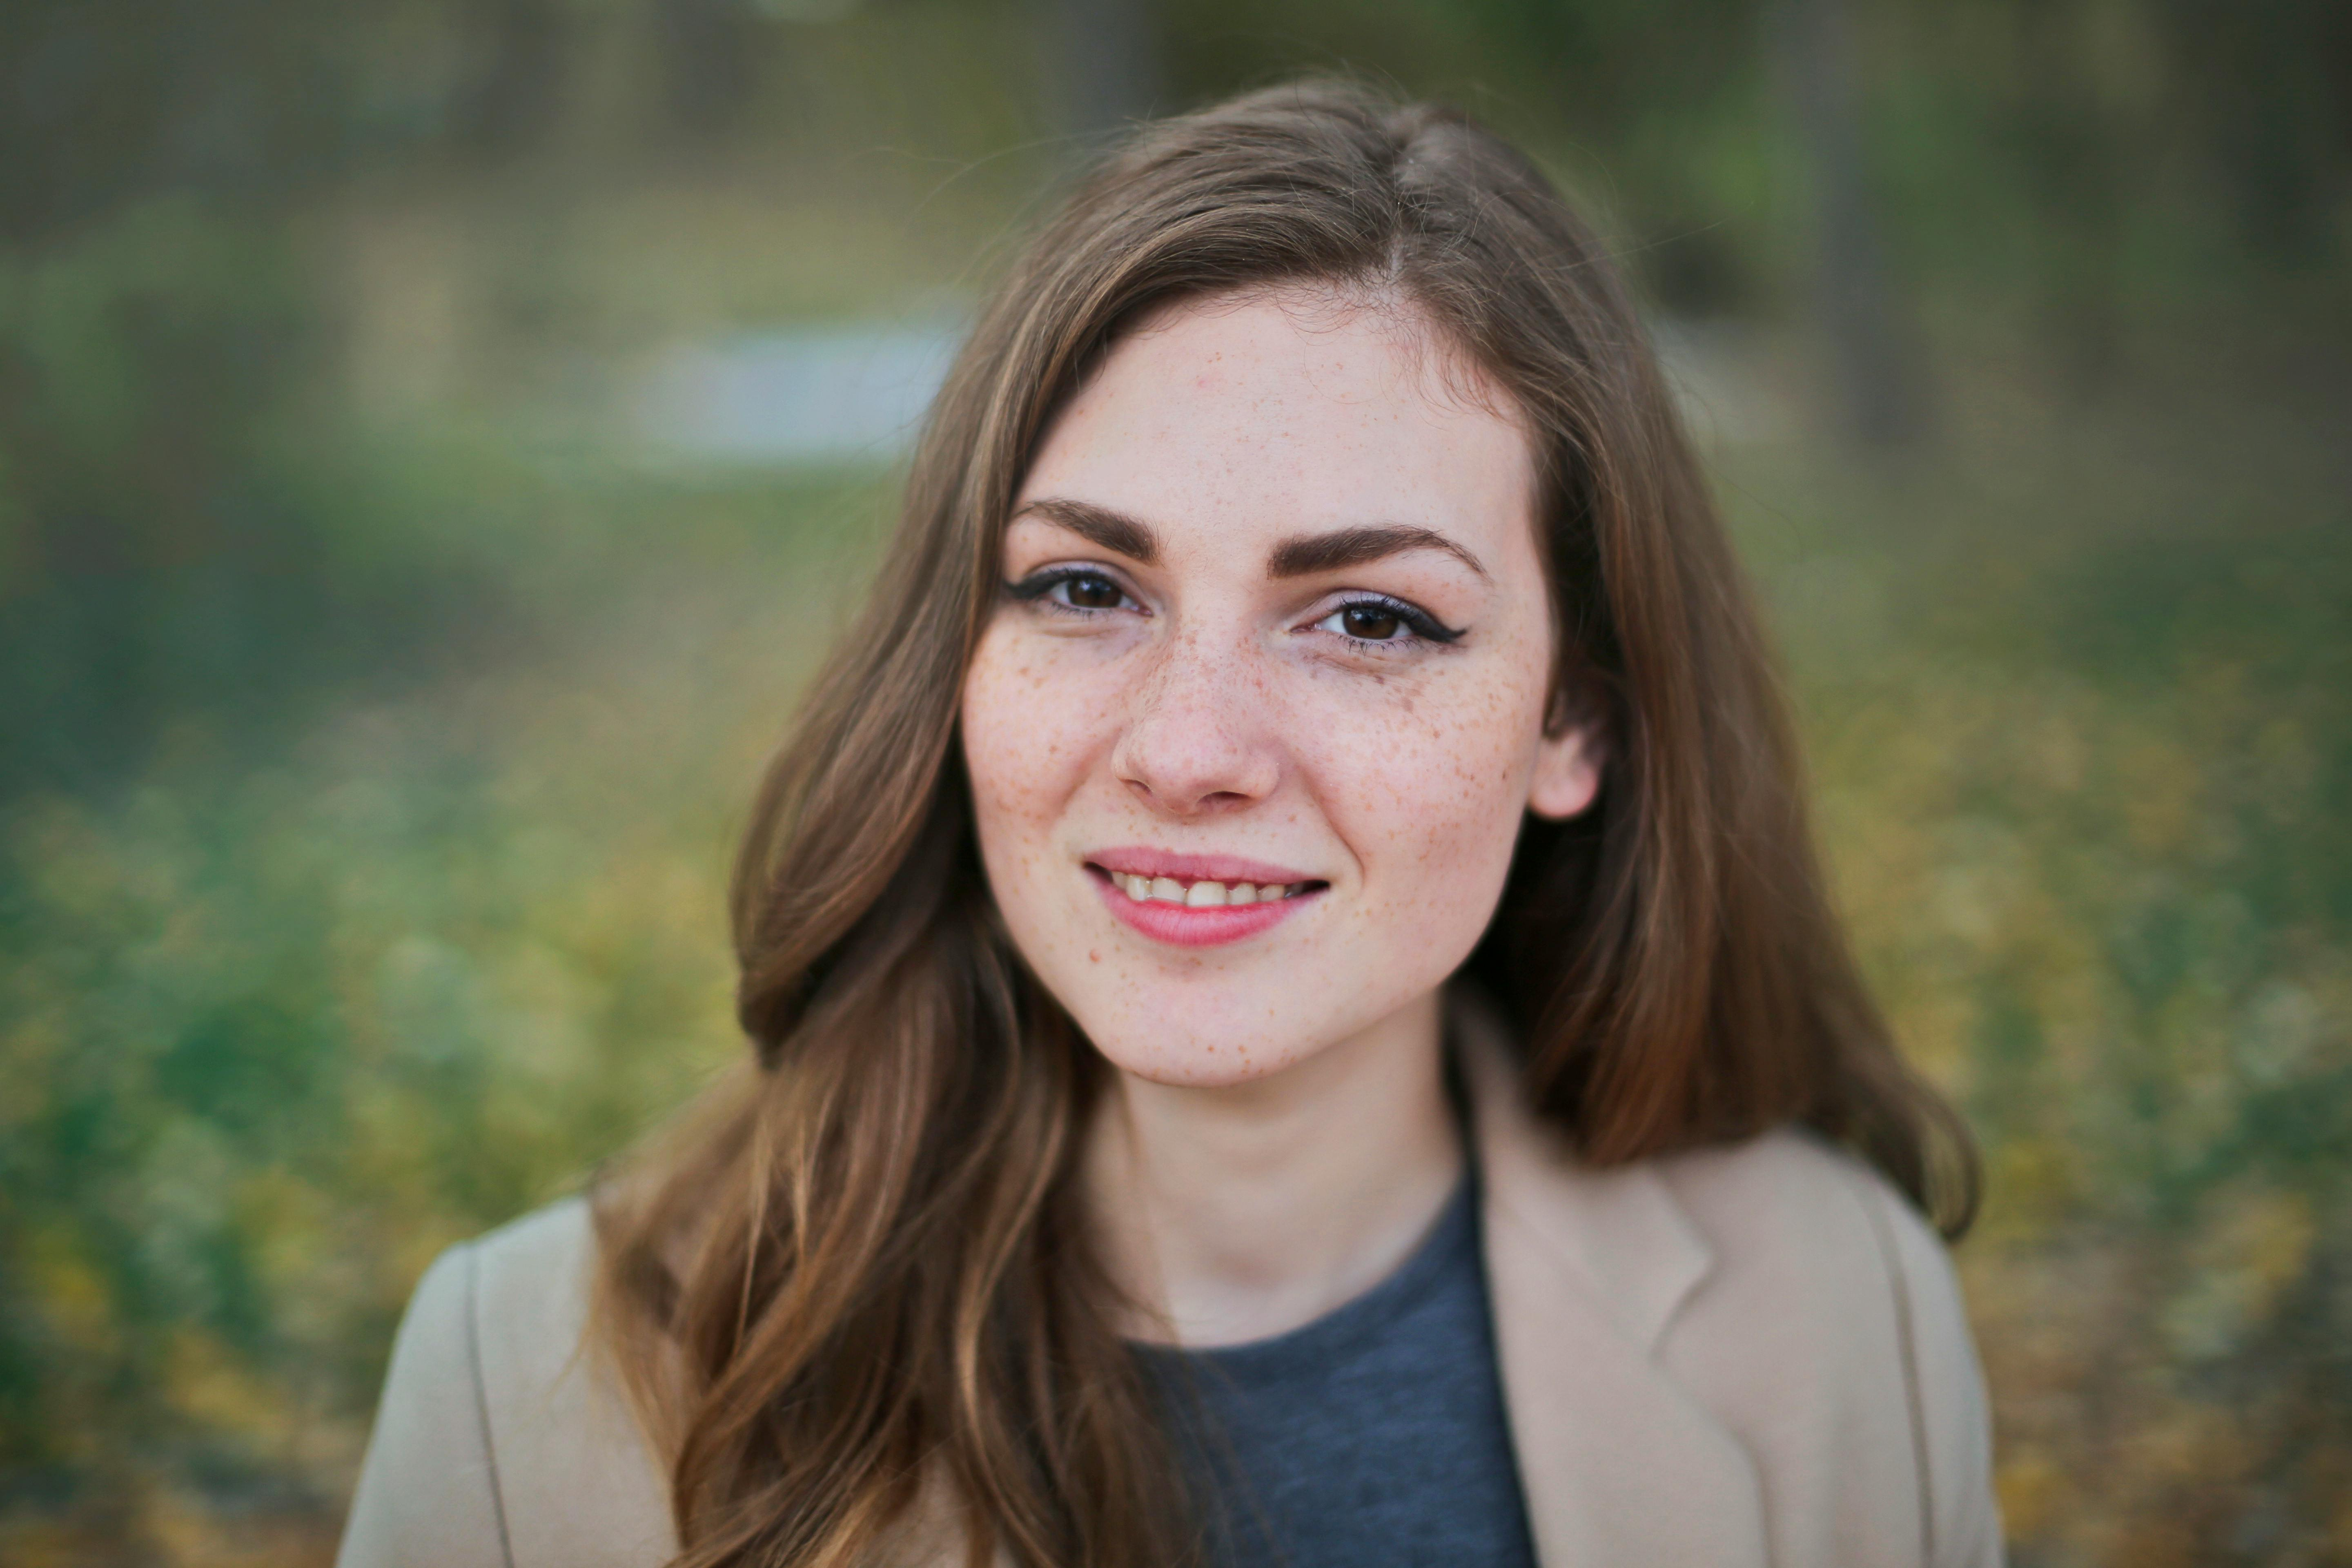

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step

Predicted gender: Female


In [51]:
from google.colab import files
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from IPython.display import display, Image

# Define image dimensions (make sure these match the model's expected input)
IMG_WIDTH = 128
IMG_HEIGHT = 128

def predict_gender_from_upload(model, label_map):
    uploaded = files.upload()

    for filename in uploaded.keys():
        print(f'User uploaded file "{filename}"')

        # Display the uploaded image
        display(Image(filename))

        # Load and preprocess the image
        try:
            img = load_img(filename, target_size=(IMG_WIDTH, IMG_HEIGHT))
            img_array = img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0) # Add batch dimension
            img_array /= 255.0 # Normalize

            # Make prediction using the trained model
            prediction = model.predict(img_array)
            predicted_class_index = np.argmax(prediction, axis=1)[0]

            # Get the gender label from the label_map
            # We need to reverse the label_map to get the label from the index
            reverse_label_map = {v: k for k, v in label_map.items()}
            predicted_gender = reverse_label_map[predicted_class_index]

            print(f"\nPredicted gender: {predicted_gender.capitalize()}")


        except Exception as e:
            print(f"Error processing image {filename}: {e}")

# Define the label_map before calling the function
# This ensures it's available even if the data loading cell wasn't run immediately before
label_map = {"male": 0, "female": 1}

# Call the function to start the upload process
# Pass the trained model and the label_map to the function
# Ensure 'model' is available in the current session (it's defined in cell 1abae2c7)
if 'model' in globals():
    predict_gender_from_upload(model, label_map)
else:
    print("Error: The model is not defined. Please run the cell that builds and trains the model.")

## Interactive Image Upload and Prediction UI

### Subtask:
Create an interactive user interface within the notebook for image upload and gender prediction.

**Reasoning**:
Use `ipywidgets` to create an interactive upload button and output area to display the uploaded image and the prediction result.

In [52]:
from google.colab import files
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from IPython.display import display, Image
import ipywidgets as widgets
from IPython.display import clear_output
from PIL import Image as PILImage
import io

# Define image dimensions (make sure these match the model's expected input)
IMG_WIDTH = 128
IMG_HEIGHT = 128

# Create output widgets for displaying the image and prediction
image_output = widgets.Output()
prediction_output = widgets.Output()

def predict_gender_interactive(change):
    with image_output:
        clear_output(wait=True)
        uploaded_file = change['owner']
        filename = uploaded_file.value

        if filename:
            print(f'User uploaded file "{list(filename.keys())[0]}"')

            # Get the uploaded image data
            img_data = list(filename.values())[0]['content']
            img = Image(img_data)

            # Display the uploaded image
            display(img)

    with prediction_output:
        clear_output(wait=True)
        # Load and preprocess the image from bytes
        try:
            img_pil = PILImage.open(io.BytesIO(img_data)).resize((IMG_WIDTH, IMG_HEIGHT))
            img_array = img_to_array(img_pil)
            img_array = np.expand_dims(img_array, axis=0) # Add batch dimension
            img_array /= 255.0 # Normalize

            # Make prediction using the trained model
            # Ensure 'model' and 'label_map' are available in the current session
            if 'model' in globals() and 'label_map' in globals():
                prediction = model.predict(img_array)
                predicted_class_index = np.argmax(prediction, axis=1)[0]

                # Get the gender label from the label_map
                reverse_label_map = {v: k for k, v in label_map.items()}
                predicted_gender = reverse_label_map[predicted_class_index]

                print(f"Predicted gender: {predicted_gender.capitalize()}")
            else:
                print("Model or label map not found. Please ensure the model is trained.")


        except Exception as e:
            with prediction_output:
                 clear_output(wait=True)
                 print(f"Error processing image: {e}")

# Create an upload button
upload_button = widgets.FileUpload(
    accept='image/*',  # Accept only image files
    multiple=False,  # Allow only one file upload at a time
    description='Upload Image', # Add a description to the button
    button_style='primary', # Style the button
    tooltip='Click to upload an image for gender classification', # Add a tooltip
    icon='upload' # Add an icon
)

# Create a label for instructions
instruction_label = widgets.Label("Upload an image for gender classification:")

# Arrange widgets using VBox and HBox for better layout
# Create a container for the upload button and instruction label
upload_box = widgets.HBox([instruction_label, upload_button])

# Create a container for the image and prediction outputs
output_box = widgets.VBox([image_output, prediction_output])


print("Interactive Gender Classification:")

# Observe changes in the upload button
upload_button.observe(predict_gender_interactive, names='value')

# Display the arranged widgets
display(widgets.VBox([upload_box, output_box]))

Interactive Gender Classification:
